In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define dataset directories
train_dir = '/content/drive/MyDrive/Image_segregated/train'
validation_dir = '/content/drive/MyDrive/Image_segregated/val'
test_dir = '/content/drive/MyDrive/Image_segregated/test'

In [ ]:
# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

In [ ]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 1999 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [ ]:
# Combine base model and custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10
62/62 [==============================] - 1505s 24s/step - loss: 0.2133 - accuracy: 0.9197 - val_loss: 4.6968 - val_accuracy: 0.0300
Epoch 2/10
62/62 [==============================] - 1453s 23s/step - loss: 0.0706 - accuracy: 0.9781 - val_loss: 6.2805 - val_accuracy: 0.0213
Epoch 3/10
62/62 [==============================] - 1451s 23s/step - loss: 0.0436 - accuracy: 0.9883 - val_loss: 7.4862 - val_accuracy: 0.0088
Epoch 4/10
62/62 [==============================] - 1447s 23s/step - loss: 0.0270 - accuracy: 0.9949 - val_loss: 8.7519 - val_accuracy: 0.0088
Epoch 5/10
62/62 [==============================] - 1476s 24s/step - loss: 0.0241 - accuracy: 0.9914 - val_loss: 9.5912 - val_accuracy: 0.0063
Epoch 6/10
62/62 [==============================] - 1493s 24s/step - loss: 0.0199 - accuracy: 0.9944 - val_loss: 10.4097 - val_accuracy: 0.0075
Epoch 7/10
62/62 [==============================] - 1480s 24s/step - loss: 0.0161 - accuracy: 0.9975 - val_loss: 11.0754 - val_accuracy: 0.01

In [ ]:
# Evaluate the model on test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

Found 809 images belonging to 2 classes.
26/26 [==============================] - 422s 16s/step - loss: 0.0089 - accuracy: 0.9988
Test Accuracy: 0.998763918876648


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

1/1 [==============================] - 0s 473ms/step


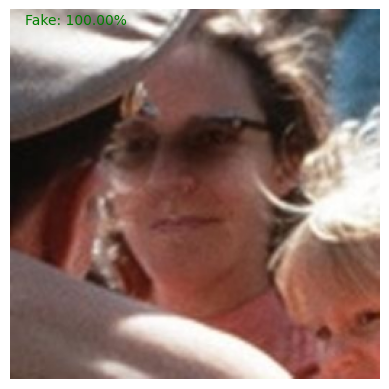

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as keras_image

def preprocess_image(image_path):
    img = keras_image.load_img(image_path, target_size=(224, 224))
    img_array = keras_image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def visualize_prediction(image_path, model):
    # Preprocess the image
    image = preprocess_image(image_path)

    # Make predictions
    predictions = model.predict(image)

    # Display the image
    img = keras_image.load_img(image_path)
    plt.imshow(img)
    plt.axis('off')

    # Display the predicted probabilities for each class
    classes = ['Fake', 'Real']
    for i, prob in enumerate(predictions[0]):
        percentage = prob * 100
        plt.text(10, 10 + i * 20, f'{classes[i]}: {percentage:.2f}%', color='red' if prob < 0.5 else 'green')

    plt.show()

# Provide the path to the image you want to predict
image_path = '/content/drive/MyDrive/New_file_segreggated/val/fake3539.jpg'

# Call the function to visualize the prediction
visualize_prediction(image_path, model)


1/1 [==============================] - 1s 685ms/step


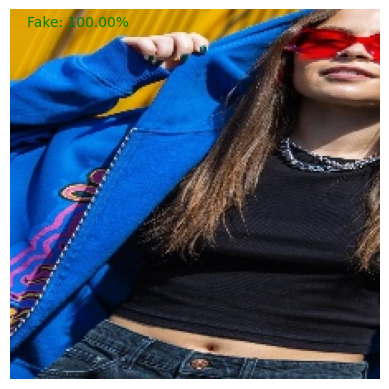

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as keras_image

def preprocess_image(image_path):
    img = keras_image.load_img(image_path, target_size=(224, 224))
    img_array = keras_image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def visualize_prediction(image_path, model):
    # Preprocess the image
    image = preprocess_image(image_path)

    # Make predictions
    predictions = model.predict(image)

    # Display the image
    img = keras_image.load_img(image_path)
    plt.imshow(img)
    plt.axis('off')

    # Display the predicted probabilities for each class
    classes = ['Fake', 'Real']
    for i, prob in enumerate(predictions[0]):
        percentage = prob * 100
        if i == 0:
            color = 'red' if prob < 0.5 else 'green'
            class_label = 'Fake'
        else:
            color = 'green' if prob < 0.5 else 'red'
            class_label = 'Real'
        plt.text(10, 10 + i * 20, f'{class_label}: {percentage:.2f}%', color=color)

    plt.show()

# Provide the path to the image you want to predict
image_path = '/content/drive/MyDrive/Image_segregated/test/real/Real2144.jpg'

# Call the function to visualize the prediction
visualize_prediction(image_path, model)


In [ ]:
# Provide the path to the image you want to predict
image_path = '/content/drive/MyDrive/real and fake images/Real1783.jpg'




1/1 [==============================] - 0s 474ms/step


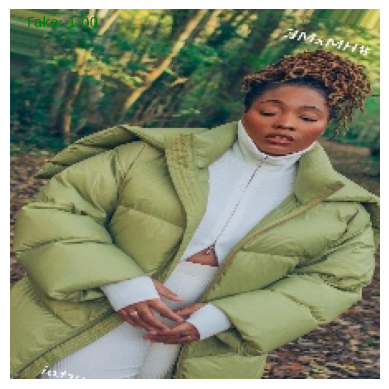

In [ ]:
# Call the function to visualize the prediction
visualize_prediction(image_path, model)

In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.2/819.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 5.

In [ ]:
import cv2
import numpy as np

# Load and preprocess the new image
img_path = '/content/drive/MyDrive/real and fake images/347226854_809812373899983_2649546801274723371_n.jpg'  # Update with the path to your new image


In [ ]:
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))  # Assuming the model was trained with input size (224, 224)
img = img / 255.0  # Normalize pixel values to be in the range [0, 1]
img = np.expand_dims(img, axis=0)  # Add batch dimension


In [ ]:
predictions = model.predict(img)
print(predictions)  # This will give you an array of probabilities for each class


1/1 [==============================] - 1s 761ms/step
[[1.]]


In [ ]:
threshold = 0.5  # Adjust the threshold as needed
predicted_class = 1 if predictions[0][0] > threshold else 0
print(f'Predicted Class: {predicted_class}')


NameError: name 'predictions' is not defined

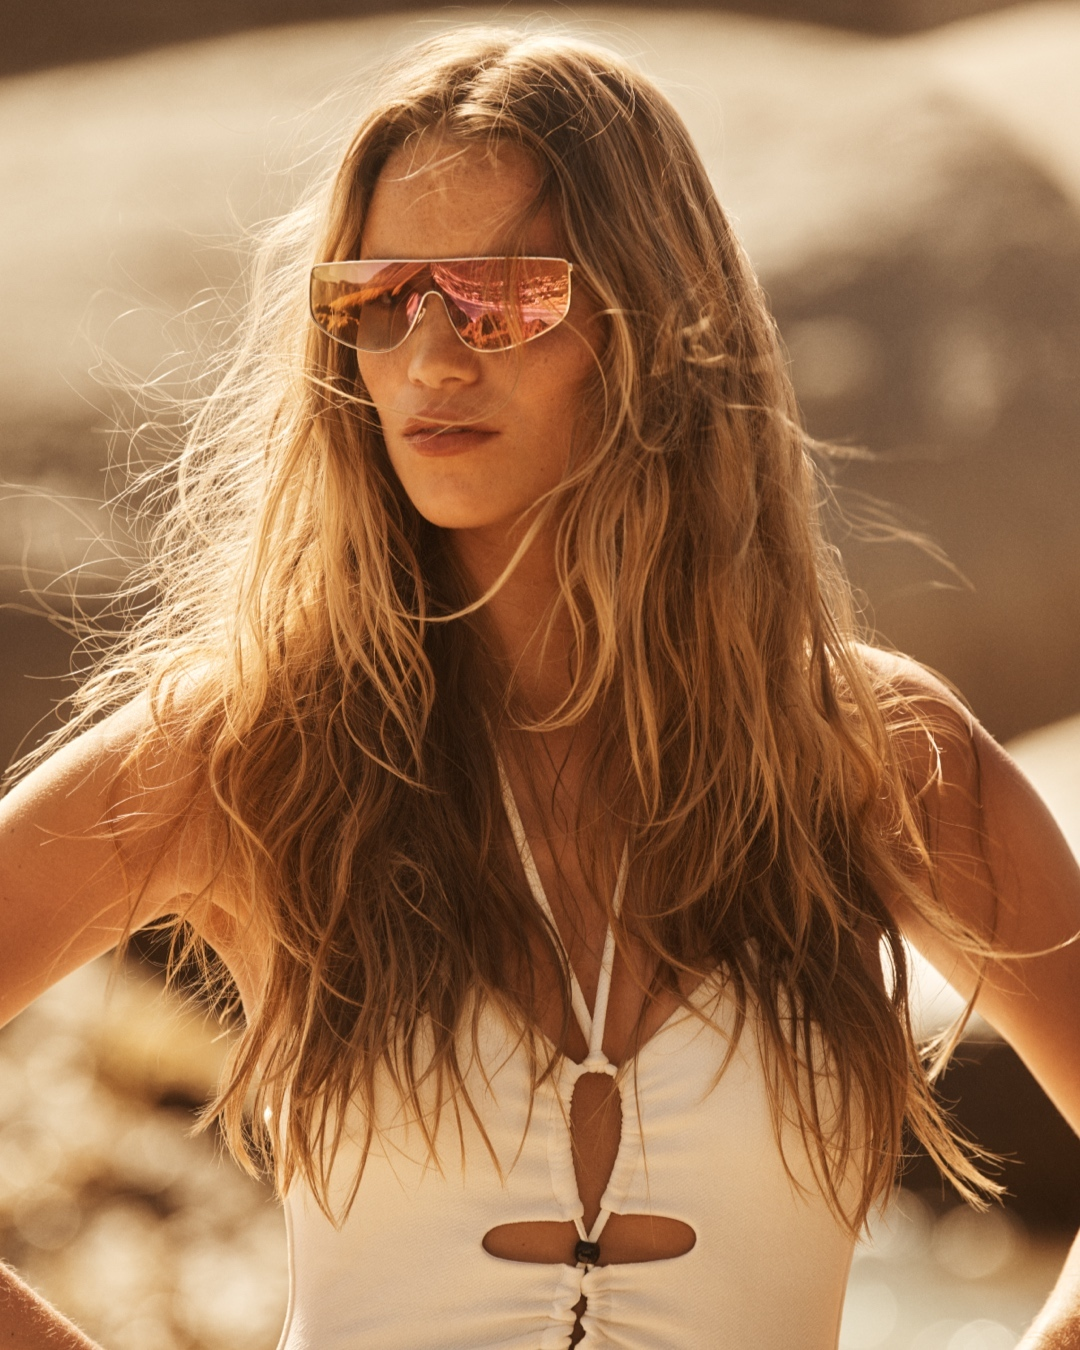

In [ ]:
from PIL import Image

input_image = Image.open("/content/drive/MyDrive/real and fake images/347226854_809812373899983_2649546801274723371_n.jpg")
input_image

In [ ]:
confidences, face_with_mask = model.predict(input_image)
confidences

ValueError: Failed to find data adapter that can handle input: <class 'PIL.JpegImagePlugin.JpegImageFile'>, <class 'NoneType'>

In [ ]:
face_with_mask

NameError: name 'face_with_mask' is not defined